In [4]:
import pandas as pd
fb = pd.read_csv('nysu_10902_2019_research_right.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [5]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [6]:
lo=fb[fb.page_name=="羅致政粉絲團"]
lo.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
23477,182836328407031_2219870311370279,182836328407031,羅致政粉絲團,政治人物,違法兼職，事證明確，卡不卡管，台大自斷,NaN,link,https://www.facebook.com/182836328407031/posts...,2019-01-15T06:40:53+0000,2019-01-15T14:40:53,...,管中閔違法兼職 監察院7：4通過彈劾 | 蘋果日報,台大校長管中閔已在上周上任，不過，對於他過去擔任學校主管及政府部門任職時在外兼職違法事宜，監...,1029,0,0,0,0,0,42,29


In [7]:
lo[lo.created_time_taipei == max(lo.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
24299,182836328407031_1395956743909587,182836328407031,羅致政粉絲團,政治人物,【直播】新北選前之夜\r\n\r\n賴清德 副總統候選人、 蘇貞昌 院長都會到場。邀請大家來...,羅致政粉絲團的直播影片。,video,https://www.facebook.com/voteforlo/videos/1395...,2020-01-10T10:15:01+0000,2020-01-10T18:15:01,...,【直播】新北選前之夜,NaN,472,0,0,0,0,0,21,9


In [8]:
lo[lo.created_time_taipei == min(lo.created_time_taipei)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
23494,182836328407031_2200814896609154,182836328407031,羅致政粉絲團,政治人物,反省是再出發的第一步\r\n1月6日民進黨主席補選\r\n懇請黨員全力支持 ①號卓榮泰,NaN,video,https://www.facebook.com/182836328407031/posts...,2019-01-02T02:57:59+0000,2019-01-02T10:57:59,...,NaN,NaN,152,0,0,0,0,0,12,2


In [9]:
lo['new_date'] = pd.to_datetime(lo['created_time_taipei']).dt.date
lo['month_year'] = pd.to_datetime(lo['new_date']).dt.to_period('M')
lo.head(1)

<ipython-input-9-067a578daaf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date'] = pd.to_datetime(lo['created_time_taipei']).dt.date
<ipython-input-9-067a578daaf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['month_year'] = pd.to_datetime(lo['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
23477,182836328407031_2219870311370279,182836328407031,羅致政粉絲團,政治人物,違法兼職，事證明確，卡不卡管，台大自斷,NaN,link,https://www.facebook.com/182836328407031/posts...,2019-01-15T06:40:53+0000,2019-01-15T14:40:53,...,1029,0,0,0,0,0,42,29,2019-01-15,2019-01


In [10]:
results = lo.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
month_year,,,,,,,,,
2019-01,6764944151060147,9508,0,0,0,0,0,726,343
2019-02,5485089852210930,7658,0,0,0,0,0,784,237
2019-03,6582107822653116,13476,0,0,0,0,0,1762,503
2019-04,11335852361235932,19712,0,0,0,0,0,2489,1030
2019-05,16089596899818764,29032,0,0,0,0,0,3203,1187
2019-06,18466469169110180,41782,0,0,0,0,0,3142,977
2019-07,19929159796366436,82948,0,0,0,0,0,4327,2638
2019-08,15723924243004700,94631,0,0,0,0,0,5463,1961
2019-09,8410471106723426,51658,0,0,0,0,0,3114,650


In [11]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-01,6764944151060147,9508,0,0,0,0,0,726,343
1,2019-02,5485089852210930,7658,0,0,0,0,0,784,237
2,2019-03,6582107822653116,13476,0,0,0,0,0,1762,503
3,2019-04,11335852361235932,19712,0,0,0,0,0,2489,1030
4,2019-05,16089596899818764,29032,0,0,0,0,0,3203,1187
5,2019-06,18466469169110180,41782,0,0,0,0,0,3142,977
6,2019-07,19929159796366436,82948,0,0,0,0,0,4327,2638
7,2019-08,15723924243004700,94631,0,0,0,0,0,5463,1961
8,2019-09,8410471106723426,51658,0,0,0,0,0,3114,650
9,2019-10,8776143763537488,63617,0,0,0,0,0,2538,1091


In [12]:
results['newhead'].map(str)

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

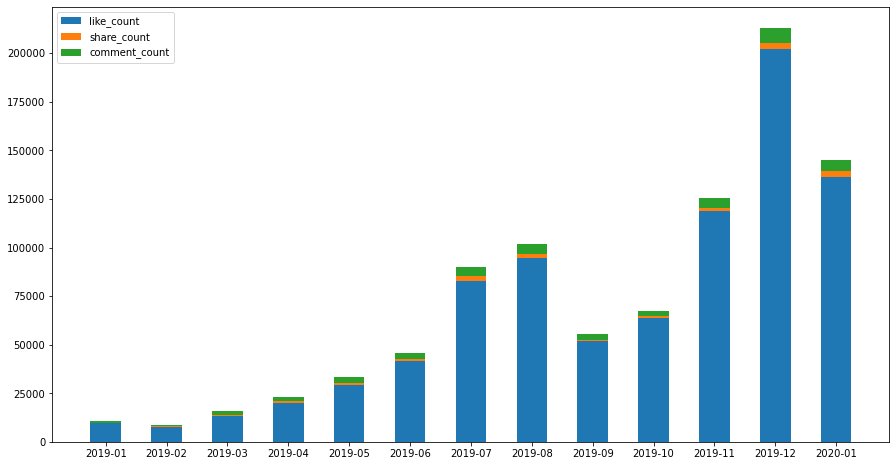

In [13]:
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

## 第十屆立委選舉日，民國109年（2020年）1月11號舉行，其中2019年12月較高的篇數分別是什麼？

In [15]:
December = lo[lo.month_year == "2019-12"]

In [17]:
results_december  = December.groupby('new_date').sum()
results_december

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-12-01,914181642035155,7398,0,0,0,0,0,315,129
2019-12-02,731345313628124,3325,0,0,0,0,0,118,51
2019-12-03,548508985221093,4717,0,0,0,0,0,146,56
2019-12-04,548508985221093,4685,0,0,0,0,0,157,97
2019-12-05,548508985221093,1823,0,0,0,0,0,64,38
2019-12-06,548508985221093,4449,0,0,0,0,0,132,61
2019-12-07,731345313628124,8863,0,0,0,0,0,263,103
2019-12-08,548508985221093,4316,0,0,0,0,0,259,83
2019-12-09,731345313628124,8826,0,0,0,0,0,372,176


In [19]:
results_december = December.groupby('new_date').sum()
results_december

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-12-01,914181642035155,7398,0,0,0,0,0,315,129
2019-12-02,731345313628124,3325,0,0,0,0,0,118,51
2019-12-03,548508985221093,4717,0,0,0,0,0,146,56
2019-12-04,548508985221093,4685,0,0,0,0,0,157,97
2019-12-05,548508985221093,1823,0,0,0,0,0,64,38
2019-12-06,548508985221093,4449,0,0,0,0,0,132,61
2019-12-07,731345313628124,8863,0,0,0,0,0,263,103
2019-12-08,548508985221093,4316,0,0,0,0,0,259,83
2019-12-09,731345313628124,8826,0,0,0,0,0,372,176


No handles with labels found to put in legend.


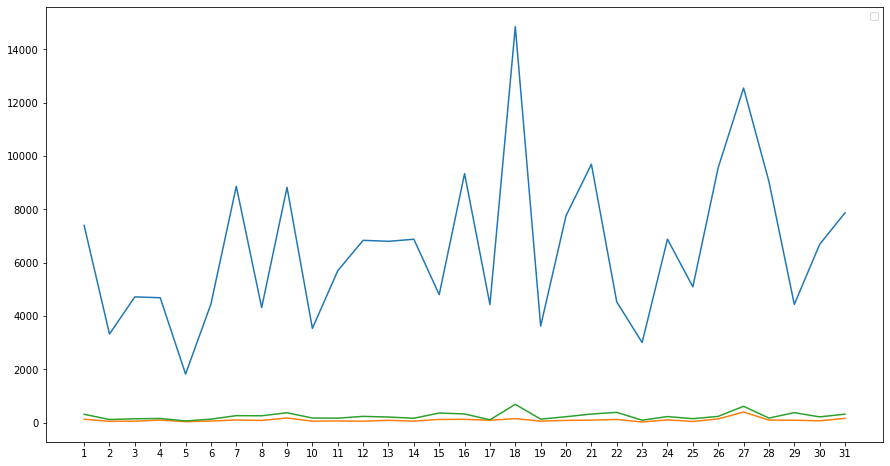

In [21]:
labels = [str(i) for i in range(1,32)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_december['like_count'])
ax.plot(labels, results_december['share_count'])
ax.plot(labels, results_december['comment_count'])

ax.legend()

plt.show()

## 從上述的途中我們可以看得出來，最高的篇數分別落在18號與27號，內容個分別為甚麼？

In [25]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-12-18"]

<ipython-input-25-bf1bc776d6ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
24274,182836328407031_2834766799880624,182836328407031,羅致政粉絲團,政治人物,馬拉松式的車隊掃街，\r\n感謝有你們沿路相挺！\r\n\r\n剛回到總部，真是充實的一天！...,羅致政粉絲團──在總統蔡英文、立委羅致政連任競選總部。,photo,https://www.facebook.com/182836328407031/posts...,2019-12-18T15:12:08+0000,2019-12-18T23:12:08,...,4879,0,0,0,0,0,111,47,2019-12-18,2019-12
24275,182836328407031_455885062005986,182836328407031,羅致政粉絲團,政治人物,【政在直播】車隊出發！\r\n\r\n⑦號羅致政，旗開得勝！,羅致政粉絲團的直播影片。,video,https://www.facebook.com/voteforlo/videos/4558...,2019-12-18T02:28:12+0000,2019-12-18T10:28:12,...,2437,0,0,0,0,0,246,33,2019-12-18,2019-12
24276,182836328407031_2833674199989884,182836328407031,羅致政粉絲團,政治人物,就在剛剛，致政抽中幸運數字7號\r\n\r\n⑦ 號羅致政，旗開得勝！\r\n\r\n#新北...,羅致政粉絲團──在新北選委會。,photo,https://www.facebook.com/182836328407031/posts...,2019-12-18T02:29:32+0000,2019-12-18T10:29:32,...,6412,0,0,0,0,0,298,57,2019-12-18,2019-12
24277,182836328407031_2833378816686089,182836328407031,羅致政粉絲團,政治人物,【直播預告】號次一決定，車隊大遊行！\r\n\r\n今天上午，致政將到選委會抽出號次，緊接著...,NaN,photo,https://www.facebook.com/182836328407031/posts...,2019-12-17T23:02:20+0000,2019-12-18T07:02:20,...,1122,0,0,0,0,0,32,14,2019-12-18,2019-12


In [24]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-12-27"]

<ipython-input-24-f6577f7038d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
24346,182836328407031_2853890234634947,182836328407031,羅致政粉絲團,政治人物,真情相挺！\r\n\r\n謝謝我的好友丁學偉，在他兒子生日當天，特別趕來站台，幽默又中肯的助...,NaN,video,https://www.facebook.com/182836328407031/posts...,2019-12-27T08:01:35+0000,2019-12-27T16:01:35,...,9732,0,0,0,0,0,563,370,2019-12-27,2019-12
24347,182836328407031_2853564484667522,182836328407031,羅致政粉絲團,政治人物,正義金剛何博文粉絲團議員前來助陣！\r\n\r\n今早，我們在埔墘興隆市場向大家問好，鄉親們...,羅致政粉絲團──在埔墘興隆市場。,photo,https://www.facebook.com/182836328407031/posts...,2019-12-27T03:48:13+0000,2019-12-27T11:48:13,...,2818,0,0,0,0,0,52,30,2019-12-27,2019-12


### 2019年12月18日羅致政抽中為參選人編號 **7號**
https://www.facebook.com/voteforlo/posts/2833674199989884
### 2019年12月18日舉行馬拉松式掃街
https://www.facebook.com/voteforlo/posts/2834766799880624?comment_id=2836005023090135
### 2019年12月27日為媒體人 **丁學偉** 為羅致政站台
https://www.facebook.com/182836328407031/videos/1248764275314682

## 另外，我們也看出7月與8月的關注比往常高一些，原因是什麼？

In [36]:
results_jul = lo[lo.month_year == "2019-07"].groupby('new_date').sum()
results_jul[results_jul.like_count == max(results_jul.like_count)]

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-07-14,1097017970442186,13647,0,0,0,0,0,605,363


In [37]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-07-14"]

<ipython-input-37-a4696b352d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
23827,182836328407031_2514079395282701,182836328407031,羅致政粉絲團,政治人物,要有創意，國旗不是只能繡在帽子上。 🇹🇼 🇰🇳\r\n\r\n這次出訪，巧思無所不在。不論是...,羅致政粉絲團──在聖克里斯多福與尼維斯。,photo,https://www.facebook.com/182836328407031/posts...,2019-07-14T15:34:29+0000,2019-07-14T23:34:29,...,1318,0,0,0,0,0,37,45,2019-07-14,2019-07
23828,182836328407031_2513315705359070,182836328407031,羅致政粉絲團,政治人物,「親愛的蔡總統，謝謝妳保護台灣，還有我在彰化和三峽的阿嬤和阿公，妳是我的超級英雄。」\r\n...,羅致政粉絲團──在 Central Park 。,photo,https://www.facebook.com/182836328407031/posts...,2019-07-14T12:30:57+0000,2019-07-14T20:30:57,...,3014,0,0,0,0,0,70,113,2019-07-14,2019-07
23829,182836328407031_2513196665370974,182836328407031,羅致政粉絲團,政治人物,#自由民主永續之旅\r\n#一天三國拼外交\r\n#加勒比海\r\n\r\n一天停留三個不同...,NaN,photo,https://www.facebook.com/182836328407031/posts...,2019-07-14T04:59:34+0000,2019-07-14T12:59:34,...,1573,0,0,0,0,0,56,13,2019-07-14,2019-07
23830,182836328407031_2513004908723483,182836328407031,羅致政粉絲團,政治人物,早安！在中央公園健走後、離開紐約前，我們登船遊覽哈德遜河，近距離欣賞自由女神像。\r\n\r...,羅致政粉絲團──在 Hudson River Park 。,video,https://www.facebook.com/182836328407031/posts...,2019-07-14T02:24:12+0000,2019-07-14T10:24:12,...,5945,0,0,0,0,0,394,124,2019-07-14,2019-07
23831,182836328407031_2512682838755690,182836328407031,羅致政粉絲團,政治人物,#自由民主永續之旅\r\n#台灣精品行銷世界\r\n#一天三國拼外交\r\n\r\n經過近四...,NaN,photo,https://www.facebook.com/182836328407031/posts...,2019-07-13T22:14:05+0000,2019-07-14T06:14:05,...,912,0,0,0,0,0,25,10,2019-07-14,2019-07
23832,182836328407031_2512189312138376,182836328407031,羅致政粉絲團,政治人物,#自由民主永續之旅\r\n#中央公園\r\n#大蘋果\r\n\r\n紐約行程的最後一天，蔡英...,羅致政粉絲團──在 Central Park 。,photo,https://www.facebook.com/182836328407031/posts...,2019-07-13T16:04:21+0000,2019-07-14T00:04:21,...,885,0,0,0,0,0,23,58,2019-07-14,2019-07


### 2019年07年14羅致政 **參與外交任務，與蔡英文總統、市長鄭文燦、立委管碧玲共遊哈德遜河**
https://www.facebook.com/voteforlo/posts/2513004908723483

In [39]:
results_aug = lo[lo.month_year == "2019-08"].groupby('new_date').sum()
results_aug[results_aug.like_count == max(results_aug.like_count)]

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-08-11,731345313628124,9298,0,0,0,0,0,825,213


In [34]:
lo['new_date']=lo['new_date'].map(str)
lo[lo['new_date'] == "2019-08-11"]

<ipython-input-34-90103f8e28ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['new_date']=lo['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
23941,182836328407031_2563198897037417,182836328407031,羅致政粉絲團,政治人物,接雲寺與慈惠宮是板橋人的信仰中心，今天陪同蔡英文 Tsai Ing-wen總統來參香，看到許...,羅致政粉絲團新增了 9 張相片。,photo,https://www.facebook.com/182836328407031/posts...,2019-08-11T13:08:38+0000,2019-08-11T21:08:38,...,1682,0,0,0,0,0,31,13,2019-08-11,2019-08
23942,182836328407031_481967819265979,182836328407031,羅致政粉絲團,政治人物,【政在直播】蔡英文總統板橋慈惠宮參香,羅致政粉絲團的直播影片。,video,https://www.facebook.com/voteforlo/videos/4819...,2019-08-11T07:47:26+0000,2019-08-11T15:47:26,...,3007,0,0,0,0,0,302,69,2019-08-11,2019-08
23943,182836328407031_701554096924714,182836328407031,羅致政粉絲團,政治人物,【政在直播】蔡英文總統板橋接雲寺參香,羅致政粉絲團的直播影片。,video,https://www.facebook.com/voteforlo/videos/7015...,2019-08-11T07:02:40+0000,2019-08-11T15:02:40,...,2941,0,0,0,0,0,441,96,2019-08-11,2019-08
23944,182836328407031_2562557433768230,182836328407031,羅致政粉絲團,政治人物,大家午安💡今天下午3點半 \r\n我們的辣台妹總統 蔡英文 Tsai Ing-wen\r\n...,NaN,photo,https://www.facebook.com/182836328407031/posts...,2019-08-11T04:34:30+0000,2019-08-11T12:34:30,...,1668,0,0,0,0,0,51,35,2019-08-11,2019-08


### 2019年08年11當日羅致政陪同 **蔡英文總統參與板橋接雲寺參香**
https://www.facebook.com/voteforlo/videos/701554096924714`

## 想知道9月的關注比往還要低一些，原因是什麼？

In [44]:
results_sep = lo[lo.month_year == "2019-09"].groupby('new_date').sum()
results_sep[results_sep.like_count == min(results_sep.like_count)]

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-09-06,365672656814062,601,0,0,0,0,0,38,21


In [46]:
pd.set_option('display.max_colwidth', None)
showlink = lo[lo.new_date == "2019-09-06"].permalink.to_string()
print(showlink)

24033    https://www.facebook.com/182836328407031/posts/2609769885713651/
24034    https://www.facebook.com/182836328407031/posts/2609380752419231/


### 可以得知2019年9月6當日羅致政當日的觸及率最低分別談到
    1.葛來儀近日出席聽證會，談到中國介入台灣大選
    https://www.facebook.com/182836328407031/posts/2609769885713651/
    2.捷運環狀線轉彎處的車輛噪音問題
    https://www.facebook.com/182836328407031/posts/2609380752419231/

In [52]:
print(politics[politics.姓名 == "羅 致 政"].政見.to_string())

16    「改變」是這些年最響亮的政治廣告口號，但要改變什麼呢？四年前當我決 定繼續在板橋基層深耕後，就深刻體認：我不再是一個可以隱遁在寧靜校園裡的 大學老師，我必須和大家一起呼吸，勇敢面對人世間的不義和苦難。這些年來， 我選擇以無給職的新北市黨部主委做為舞台，全力為民眾和公職人員搭好溝通的 橋樑。我深切體認，大家想改變的不是只換個政黨執政而已，而是有權力的人可 以用心讓小市民生活過得更好。 這是我的從政初衷。沒有派系，也不是政治世家，選擇從校園踏進政治圈， 答案始終只有一個，就是為了實踐理想。羅致政承諾將以「正直理性問政、人民 福祉優先」的理念，來落實國會改革與為民服務的目標： 一、國會改革 １. 以國家和人民的利益為先，政黨和個人的利益為後。 ２. 國會運作公開透明，讓立法院不再有密室政治、黑箱運作的空間，提高立法 院問政效率。 ３. 修法降低公投法和修憲門檻，實現18歲投票權訴求，保障直接民權，補足代 議制度的缺陷。 二、為民服務 １. 推動十年長照2.0計畫，落實「長照、托育、女性就業」三合一照顧政策， 減輕婦女照顧重擔。 ２. 推動「食安五環」計畫，從食品源頭就全面監控，對黑心廠商課以更重的法 律責任。 ３. 配合「五大創新研發計畫」，調整高等教育階段的課程與科系，解決大學畢 業生學用落差問題。 ４. 提供只租不售的高品質青年社會住宅，並針對特殊居住要求以及弱勢者提供 補助。 ５. 確保國內文化多樣性，積極保存、維護和活化有形及非物質的文化資產。
